<a href="https://colab.research.google.com/github/Colley-K/ML_Projects/blob/master/customer_churn_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Setup and Import

In [4]:

#Colab stuffs:

#get a fast operator system
!nvidia-smi

#mount google drive
from google.colab import drive
drive.mount('/content/drive')#click on the link it provides and copy and paste that code into the authorization area

#access the OS system to work with current directories:
import os 

Thu Aug 29 21:14:00 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.40       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [7]:
#importing functions for this notebook
from google.colab import files
uploaded = files.upload()

Saving telco.xlsx to telco (1).xlsx


In [0]:
#imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
sns.set_style("whitegrid")
sns.despine()
sns.set(rc={'figure.figsize':(11.7,8.27)})
%matplotlib inline

In [0]:
#Turn the CSV files into data frames
telco = pd.read_csv('drive/My Drive/telco.csv', low_memory=False)  

## 2. Clean Up the Dataset

In [10]:
telco.head()
#Trying to predict churn and what are the biggest indicators

,customer_id,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,tollfree,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,equipten,cardten,wireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,loglong,logtoll,logequi,logcard,logwire,lninc,custcat,churn
0,1.0,2.0,13.0,44.0,1.0,9.0,64.0,4.0,5.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,3.70,0.00,0.0,7.50,0.0,37.45,0.00,0.0,110.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.308333,NaN,NaN,2.014903,NaN,4.158883,1.0,1.0
1,2.0,3.0,11.0,33.0,1.0,7.0,136.0,5.0,5.0,0.0,0.0,6.0,1.0,0.0,1.0,1.0,4.40,20.75,0.0,15.25,35.7,42.00,211.45,0.0,125.0,380.35,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.481605,3.032546,NaN,2.724580,3.575151,4.912655,4.0,1.0
2,3.0,3.0,68.0,52.0,1.0,24.0,116.0,1.0,29.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0,18.15,18.00,0.0,30.25,0.0,1300.60,1247.20,0.0,2150.0,0.00,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2.898671,2.890372,NaN,3.409496,NaN,4.753590,3.0,0.0
3,4.0,2.0,33.0,33.0,0.0,12.0,33.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,9.45,0.00,0.0,0.00,0.0,288.80,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.246015,NaN,NaN,NaN,NaN,3.496508,1.0,1.0
4,5.0,2.0,23.0,30.0,1.0,9.0,30.0,1.0,2.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,6.30,0.00,0.0,0.00,0.0,157.05,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.840550,NaN,NaN,NaN,NaN,3.401197,3.0,0.0


In [11]:
telco.shape

(1000, 43)

In [12]:
telco.columns

Index(['customer_id', 'region', 'tenure', 'age', 'marital', 'address',
       'income', 'ed', 'employ', 'retire', 'gender', 'reside', 'tollfree',
       'equip', 'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon',
       'cardmon', 'wiremon', 'longten', 'tollten', 'equipten', 'cardten',
       'wireten', 'multline', 'voice', 'pager', 'internet', 'callid',
       'callwait', 'forward', 'confer', 'ebill', 'loglong', 'logtoll',
       'logequi', 'logcard', 'logwire', 'lninc', 'custcat', 'churn'],
      dtype='object')

In [13]:
#all float values
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 43 columns):
customer_id    1000 non-null float64
region         1000 non-null float64
tenure         1000 non-null float64
age            1000 non-null float64
marital        1000 non-null float64
address        1000 non-null float64
income         1000 non-null float64
ed             1000 non-null float64
employ         1000 non-null float64
retire         1000 non-null float64
gender         1000 non-null float64
reside         1000 non-null float64
tollfree       1000 non-null float64
equip          1000 non-null float64
callcard       1000 non-null float64
wireless       1000 non-null float64
longmon        1000 non-null float64
tollmon        1000 non-null float64
equipmon       1000 non-null float64
cardmon        1000 non-null float64
wiremon        1000 non-null float64
longten        1000 non-null float64
tollten        1000 non-null float64
equipten       1000 non-null float64
cardte

In [0]:
#see the unique items in each column:
# for item in telco.columns:
#     print(item)
#     print (telco[item].unique())

In [15]:
telco.isna().sum()
mis_val_percent = 100 * telco.isnull().sum() / len(telco)
print (mis_val_percent)

customer_id     0.0
region          0.0
tenure          0.0
age             0.0
marital         0.0
address         0.0
income          0.0
ed              0.0
employ          0.0
retire          0.0
gender          0.0
reside          0.0
tollfree        0.0
equip           0.0
callcard        0.0
wireless        0.0
longmon         0.0
tollmon         0.0
equipmon        0.0
cardmon         0.0
wiremon         0.0
longten         0.0
tollten         0.0
equipten        0.0
cardten         0.0
wireten         0.0
multline        0.0
voice           0.0
pager           0.0
internet        0.0
callid          0.0
callwait        0.0
forward         0.0
confer          0.0
ebill           0.0
loglong         0.0
logtoll        52.5
logequi        61.4
logcard        32.2
logwire        70.4
lninc           0.0
custcat         0.0
churn           0.0
dtype: float64


In [0]:
#get rid of columns with too many missing values
telco.drop(columns= ["logtoll", "logequi", "logcard", "logwire"], axis=1, inplace=True)

#getting rid of irrelevant columns
telco.drop(['customer_id'], axis=1, inplace=True)

In [0]:
# Converting all the yes and no data to 1's and 0's

# columns_to_convert = ['Partner', 
#                       'Dependents', 
#                       'PhoneService', 
#                       'PaperlessBilling', 
#                       'Churn']

# for item in columns_to_convert:
#     df[item].replace(to_replace='yes', value=1, inplace=True)
#     df[item].replace(to_replace='no',  value=0, inplace=True)
# df.head()

In [0]:
#Replacing categorical values with one-hot encoding/binary data
# ml_dummies = pd.get_dummies(telco)
# ml_dummies.fillna(value=0, inplace=True)
# ml_dummies.head()

## EDA

Customer churn percentage = 27.400000000000002


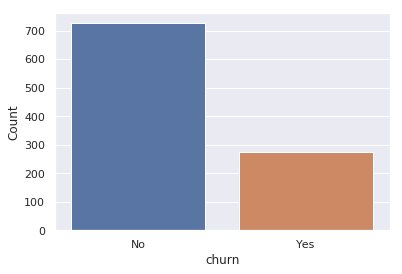

In [19]:
#What does the churn look like?
ax= sns.countplot(telco.churn)
ax.set(ylabel='Count')
ax.set(xticks=range(2), xticklabels=["No", "Yes"])
print (f"Customer churn percentage = {len(telco[telco.churn == 1])/ len(telco.churn) *100}")

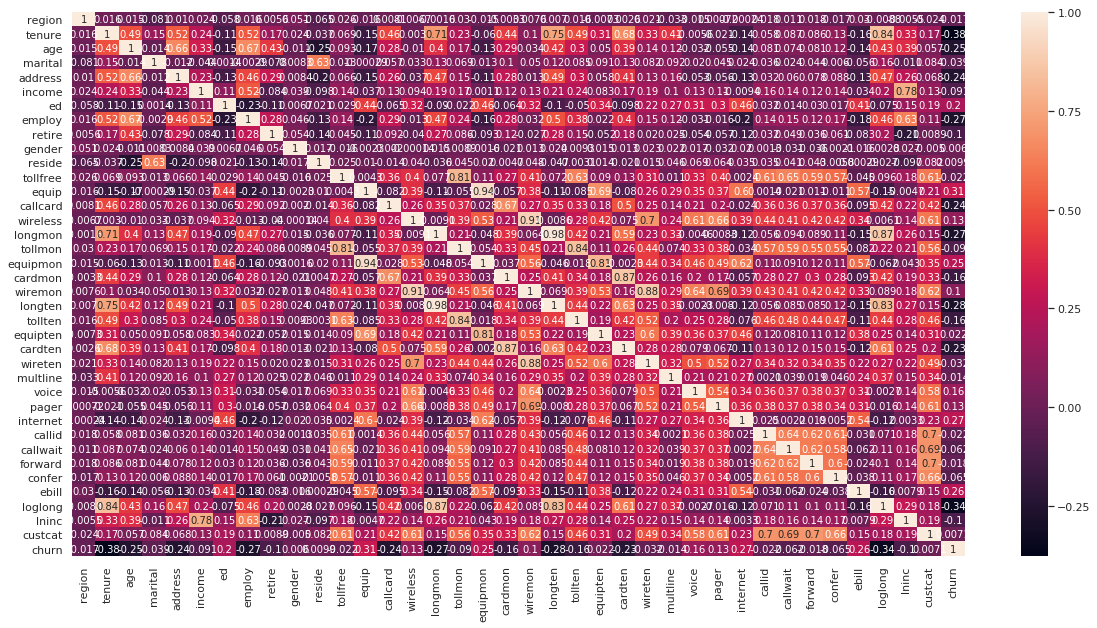

In [20]:

#are there any strong correlations??
def show_correlations(dataframe, show_chart = True):
    fig = plt.figure(figsize = (20,10))
    corr = dataframe.corr()
    if show_chart == True:
        sns.heatmap(corr, 
                    xticklabels=corr.columns.values,
                    yticklabels=corr.columns.values,
                    annot=True)
    return corr

correlation_df = show_correlations(telco,show_chart=True)

*You can see there aren't a ton of variables that have a strong correlation to churn. This will be a problem where it is up to the sum of all parts.*

In [0]:
#adding a random column for a baseline measure
telco['---randomColumn---'] = np.random.randint(0,1000, size=len(telco))

In [22]:
show_correlations(telco, show_chart=False)["churn"].sort_values(ascending=False)

churn                 1.000000
equip                 0.305051
internet              0.270432
ebill                 0.256880
equipmon              0.253659
ed                    0.203965
voice                 0.159410
wireless              0.132103
pager                 0.130111
wiremon               0.099533
equipten              0.021670
reside                0.009852
---randomColumn---    0.009543
custcat               0.007132
gender                0.006021
multline             -0.014143
region               -0.016567
forward              -0.018306
callid               -0.021513
tollfree             -0.021895
wireten              -0.032341
marital              -0.038701
callwait             -0.062314
confer               -0.065237
tollmon              -0.090126
income               -0.091339
retire               -0.104648
lninc                -0.104648
cardmon              -0.156919
tollten              -0.162703
cardten              -0.232340
address              -0.243072
callcard

<Figure size 1440x720 with 0 Axes>

## 3. Logistic Regression

In [0]:
telco["churn"] = telco["churn"].astype(int)
y = telco["churn"].values
X = telco.drop(labels = ["churn"],axis = 1)

# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
#testing the model
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.785


*This means that our model correctly categorized the churn rate 78% of the time... Now it's time to see if we can improve that model with detecting multicoliniariety*

In [26]:
#exploring which features have the biggest influence

# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
 index=X.columns.values)
weights.sort_values(ascending = False)

equip                 1.306633
voice                 0.623175
tollfree              0.578953
internet              0.372381
callid                0.198689
multline              0.156282
gender                0.146216
ebill                 0.111665
lninc                 0.109071
wireless              0.101862
marital               0.085299
ed                    0.044496
longmon               0.034322
cardmon               0.021455
wiremon               0.018446
tollten               0.000941
---randomColumn---    0.000124
equipten              0.000021
cardten              -0.000193
wireten              -0.000314
age                  -0.000347
income               -0.000589
longten              -0.000936
address              -0.015757
equipmon             -0.017712
tenure               -0.021474
employ               -0.030857
region               -0.032333
reside               -0.035691
tollmon              -0.039521
forward              -0.040659
custcat              -0.049584
retire  

## What are the Biggest Factors of Churn?


*   call card clients have the highest rate of churn, not suprisingly!
*   Equipment, voice, tollfree are all indicators of customers that are not likely to churn.



## KNN and Decision Tree

KNeighborsClassifier
0.715 
 - - - - -  

DecisionTreeClassifier
0.775 
 - - - - -  



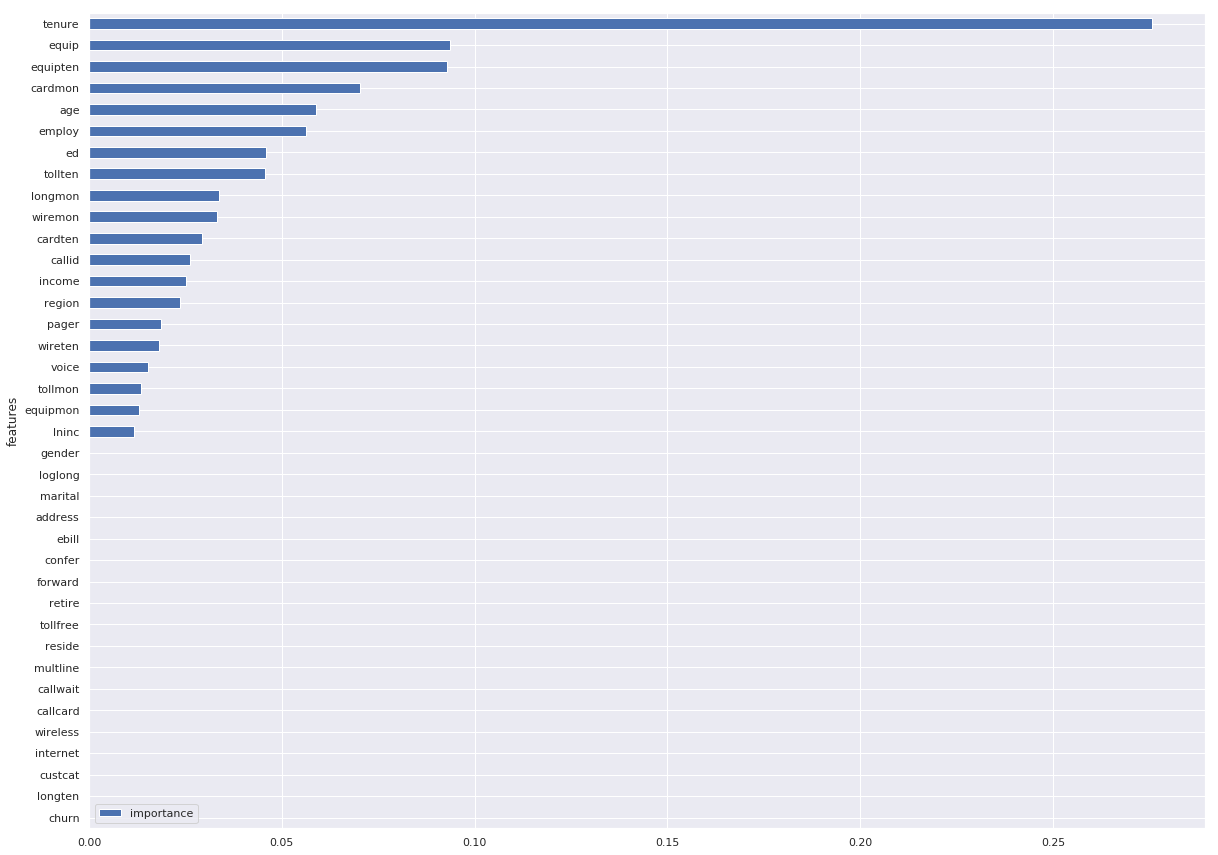

In [38]:
# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

classifiers = [
    KNeighborsClassifier(5),    
    DecisionTreeClassifier(max_depth=5)
]
    

# iterate over classifiers
for item in classifiers:
    classifier_name = ((str(item)[:(str(item).find("("))]))
    print (classifier_name)
    
    # Create classifier, train it and test it.
    clf = item
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    score = clf.score(X_test, y_test)
    print (round(score,3),"\n", "- - - - - ", "\n")
    
feature_df = pd.DataFrame()
feature_df['features'] = telco.columns
feature_df= feature_df [feature_df.features != "---randomColumn---"]
feature_df['importance'] = clf.feature_importances_
feature_df.sort_values(by='importance', ascending=False)    
feature_df.set_index(keys='features').sort_values(by='importance', ascending=True).plot(kind='barh', figsize=(20, 15))

Confusion matrix, without normalization
[[133  13]
 [ 32  22]]
Normalized confusion matrix
[[0.91 0.09]
 [0.59 0.41]]


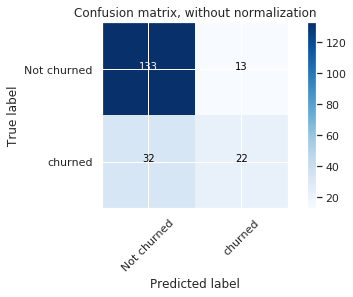

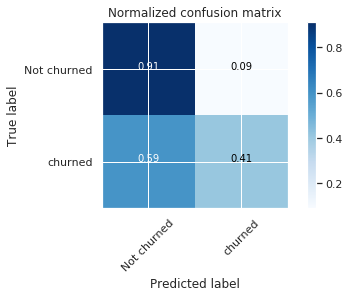

              precision    recall  f1-score   support

 Not churned       0.81      0.91      0.86       146
     churned       0.63      0.41      0.49        54

    accuracy                           0.78       200
   macro avg       0.72      0.66      0.67       200
weighted avg       0.76      0.78      0.76       200



In [41]:
#Confusion Matrix

# Confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = ['Not churned','churned']

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


from sklearn.metrics import classification_report
eval_metrics = classification_report(y_test, pred, target_names=class_names)
print(eval_metrics)

### EXTRAS

In [0]:
Converting all the yes and no data to 1's and 0's

columns_to_convert = ['Partner', 
                      'Dependents', 
                      'PhoneService', 
                      'PaperlessBilling', 
                      'Churn']

for item in columns_to_convert:
    df[item].replace(to_replace='yes', value=1, inplace=True)
    df[item].replace(to_replace='no',  value=0, inplace=True)
df.head()